In [1]:
import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt
plt.rcParams['image.origin']='lower'

import matplotlib
from matplotlib.colors import LogNorm, Normalize
from matplotlib.animation import FFMpegWriter, PillowWriter
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['animation.html'] = 'html5'
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':'nearest'})


In [2]:
def create_anim(data1, data2, 
                cmap1='viridis', cmap2='magma',
                norm1=None, norm2=None,
                interval=500, # in ms
                ):
    numframes = data1.shape[0]
    print(numframes)

    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),dpi=125)

    im1 = ax[0].imshow(data1[0], norm=norm1, cmap=cmap1)
    im1_title = ax[0].set_title(f'Command {0:d}', fontsize=18)
    divider = make_axes_locatable(ax[0])
    cax1 = divider.append_axes("right", size="4%", pad=0.075)
    cbar1 = fig.colorbar(im1, cax=cax1)

    vmin2,vmax2 = (1e-9, 5e-6)
    im2 = ax[1].imshow(data2[0], norm=norm2, cmap=cmap2)
    im2_title = ax[1].set_title(f'Image {0:d}', fontsize=18)
    divider = make_axes_locatable(ax[1])
    cax2 = divider.append_axes("right", size="4%", pad=0.075)
    cbar2 = fig.colorbar(im2, cax=cax2)

    def animate(i):
        im1.set_data(data1[i])
        im1_title.set_text(f'Command {i:d}')
        # im1.set_clim(vmin=, vmax=np.max(data1[i]))

        im2_arr = data2[i]
        im2.set_data()
        im2_title.set_text(f'Image {i:d}')

    anim = matplotlib.animation.FuncAnimation(fig, animate, frames=numframes, interval=interval)
    return anim

In [4]:
date = 20240809
ref_im = fits.getdata(f'../data/{date}_ref_coro_im.fits')
ims = fits.getdata(f'../data/{date}_iefc_hadamard_ims.fits')
commands = fits.getdata(f'../data/{date}_iefc_hadamard_commands.fits')


In [8]:
ref_im.shape

(150, 150)

In [12]:
all_ims = np.insert(ims, 0, ref_im, axis=0)
all_commands = np.insert(commands, 0, np.zeros((34,34)), axis=0)
print(all_ims.shape, all_commands.shape)

(31, 150, 150) (31, 34, 34)


31


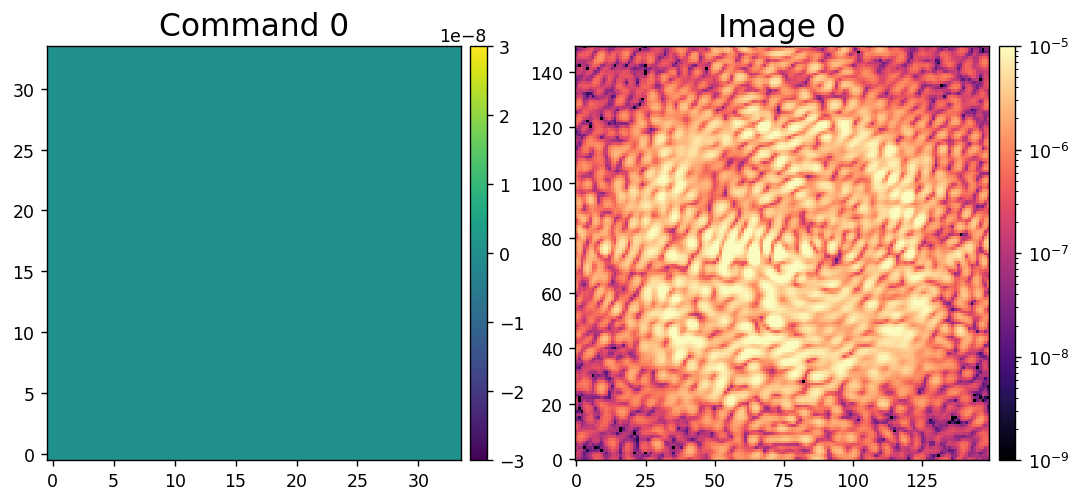

In [15]:
norm1 = Normalize(vmin=-30e-9, vmax=30e-9)
norm2 = LogNorm(vmin=1e-9, vmax=1e-5, clip=True)

create_anim(all_commands, all_ims, norm1=norm1, norm2=norm2, interval=500)